In [22]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [23]:
!ln -s /content/gdrive/My\ Drive/ /mydrive

In [24]:
# change makefile to have GPU and OPENCV enabled
%cd /content/gdrive/MyDrive/yolov3-weapon/yolov3/darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/gdrive/MyDrive/yolov3-weapon/yolov3/darknet


In [25]:
# verifying CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


In [26]:
# make darknet 
%cd /content/gdrive/MyDrive/yolov3-weapon/yolov3/darknet
!make

/content/gdrive/MyDrive/yolov3-weapon/yolov3/darknet
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
  946 |                 float rgb[3];
      |                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
 1147 |             if (iterat

In [6]:
!./darknet detector train /content/gdrive/MyDrive/yolov3-weapon/yolov3/darknet/data/obj.data  /content/gdrive/MyDrive/yolov3-weapon/yolov3/darknet/cfg/yolov3-custom.cfg  /content/gdrive/MyDrive/yolov3-weapon/yolov3/darknet/backup/yolov3-custom_last.weights -dont_show

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.864969), count: 2, class_loss = 0.021218, iou_loss = 0.027338, total_loss = 0.048556 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.701666), count: 2, class_loss = 0.148954, iou_loss = 0.152403, total_loss = 0.301357 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.000002, iou_loss = 0.000000, total_loss = 0.000002 
 total_bbox = 44702, rewritten_bbox = 0.467541 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.774241), count: 4, class_loss = 0.286000, iou_loss = 0.269878, total_loss = 0.555878 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.814083), count: 1, class_loss = 0.300617, iou_loss = 0.021881, total_loss = 0.322498 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00

In [16]:
!./darknet detector test /content/gdrive/MyDrive/yolov3-weapon/yolov3/darknet/data/obj.data  /content/gdrive/MyDrive/yolov3-weapon/yolov3/darknet/cfg/yolov3-custom.cfg   /content/gdrive/MyDrive/yolov3-weapon/yolov3/darknet/backup/yolov3-custom_3000.weights  /content/gdrive/MyDrive/yolov3-weapon/yolov3/darknet/Shotgun-33.jpg  

 CUDA-version: 11080 (12000), cuDNN: 8.7.0, GPU count: 1  
 OpenCV version: 4.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  

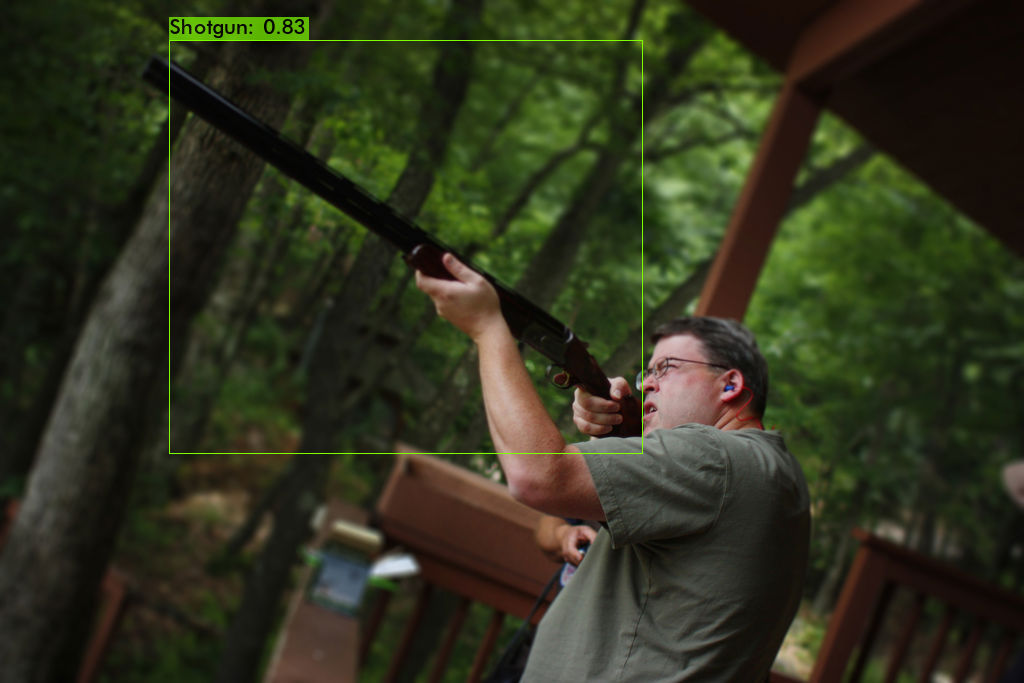

In [19]:
from google.colab.patches import cv2_imshow
import cv2 as cv

img = cv.imread('/content/gdrive/MyDrive/yolov3-weapon/yolov3/darknet/predictions.jpg')#mentioning a path of an image
cv2_imshow(img)

In [20]:
!./darknet detector test /content/gdrive/MyDrive/yolov3-weapon/yolov3/darknet/data/obj.data  /content/gdrive/MyDrive/yolov3-weapon/yolov3/darknet/cfg/yolov3-custom.cfg  /content/gdrive/MyDrive/yolov3-weapon/yolov3/darknet/backup/yolov3-custom_3000.weights  /content/gdrive/MyDrive/yolov3-weapon/yolov3/darknet/Handgun-1.jpeg

 CUDA-version: 11080 (12000), cuDNN: 8.7.0, GPU count: 1  
 OpenCV version: 4.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  

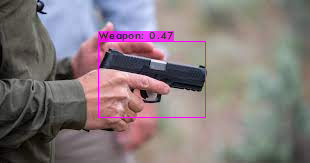

In [21]:
from google.colab.patches import cv2_imshow
import cv2 as cv

img = cv.imread('/content/gdrive/MyDrive/yolov3-weapon/yolov3/darknet/predictions.jpg')#mentioning a path of an image
cv2_imshow(img)

In [28]:
!./darknet detector test /content/gdrive/MyDrive/yolov3-weapon/yolov3/darknet/data/obj.data  /content/gdrive/MyDrive/yolov3-weapon/yolov3/darknet/cfg/yolov3-custom.cfg  /content/gdrive/MyDrive/yolov3-weapon/yolov3/darknet/backup/yolov3-custom_3000.weights  /content/gdrive/MyDrive/yolov3-weapon/yolov3/darknet/Shotgun-3.jpg

 CUDA-version: 11080 (12000), cuDNN: 8.7.0, GPU count: 1  
 OpenCV version: 4.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  

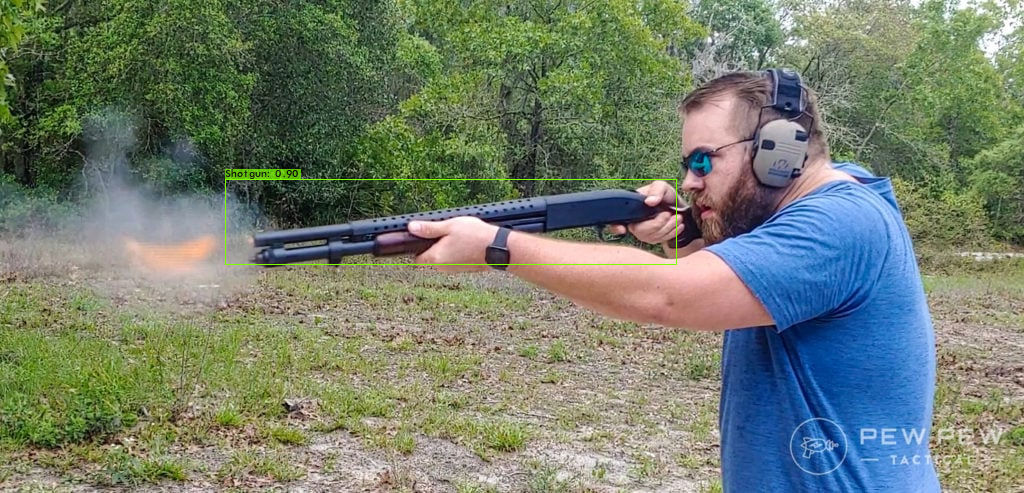

In [29]:
from google.colab.patches import cv2_imshow
import cv2 as cv

img = cv.imread('/content/gdrive/MyDrive/yolov3-weapon/yolov3/darknet/predictions.jpg')#mentioning a path of an image
cv2_imshow(img)